# Проект анализ продаж игр

Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель:** необходимо составить прогноз продаж на бедующий год. 

**Задачи:** обработать и подготовить данные к исследованию; исследовать и выявить предпочтение пользователей, проверить гипотезы.

Перед нами данные до 2016 год, и мы планируем рекламную кампанию на 2017-й. Нужно отработать принцип работы с данными. В результате проделанной работы необходимо определить предпочтение пользователей и на основании них выстраивать рекламную компанию продуктов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Шаг. Открытие файла

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 10 столбцов. Тип данных в столбцах  — `object`, `float64`. Количество значений в столбцах не одинаковое, следовательно в данных есть пропущенные значения.
В документе 16715 строк.

Согласно документации столбцы называться:
*   `Name` — название игры;
*   `Platform` — платформа;
*   `Year_of_Release` — год выпуска;
*   `Genre` — жанр игры;
*   `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
*   `EU_sales` — продажи в Европе (миллионы проданных копий)
*   `JP_sales` — продажи в Японии (миллионы проданных копий)
*   `Other_sales` — продажи в других странах (миллионы проданных копий)
*   `Critic_Score` — оценка критиков (максимум 100)
*   `User_Score` — оценка пользователей (максимум 10)
*   `Rating` — рейтинг от организации ESRB

**Описание таблицы:** Сразу бросается не корректный формат в столбце, User_Score. Заголовки в столбцах отображены не по стилю. В таблице присутствуют пропуски. 

## Шаг. Подготовка данных

### Приведение всех столбцов к нижнему регистру.

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower()

In [7]:
 #проверка
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных в нужный тип.

При первичном ознакомлении с данными стало понятно что столбец `user_score` находяться в не верном типе данных (object), а надо будет перевести в (float64)

In [8]:
#обработка 'tbd' и заменить на пропуск
df['user_score'] = df['user_score'].replace('tbd', float('nan'))

In [9]:
df['user_score'] = df['user_score'].astype(float)

### Обработка пропусков

In [10]:
#столбцы в которых есть пропуски
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пропуски в `name`, `year_of_release` и `genre` можно спокойно удалить, т.к. их не большое количество. Скорее всего данные пропуски связаны не корректной подачей информацией производителем или просто не была заполнена.

`critic_score`, `user_score`, `rating` заполнять любым изученным методом пропуски некорректно, а если удалять пропуски, то выйдет слишком большая потеря данных. Отсутствие пропусков в данных столбцах связано с тем, что игра может быть не популярная поэтому пользователи и критики не посчитали нужным ее оценить. Проще говоря не популярная. Тоже самое и с рейтинговым агентством. Поэтому эти столбцы оставляем без изменений.

In [11]:
df = df.dropna(subset=['name', 'year_of_release', 'genre'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

### Добавление столбца `sales_sum` который суммирует продажи со всех регионов:

In [12]:
df['sales_sum'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [13]:
df.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN,0.01
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01


### **Проверка на дубликаты**

In [14]:
df.duplicated().sum()#Явные дубликаты

0

In [15]:
df['platform'].unique()#не явные дубликаты

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [17]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Вывод:** 
    
Не явных дубликатов не было замечено, как и явных. 
Столбец name тоже был проверен на неявные дубликаты, на первый взгляд ничего не было замечено. 


**Общий вывод к 2 шагу:**
    
В данной главе произошла основная подготовка таблицы для дальнейшего анализу и изучение внутренней структуры данных. Обработаны пропуски, добавление дополнительного суммирующего столбца, приведение всех данных к нужному типу. 

## Шаг. Исследовательский анализ данных

### Колличество выпускаевых игр по годам

Text(0.5, 0, 'Год')

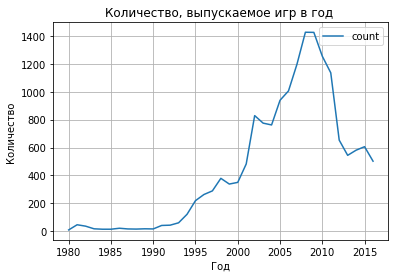

In [18]:
df.groupby('year_of_release')['name'].agg(['count']).plot(title='Количество, выпускаемое игр в год ', grid=True)
plt.ylabel("Количество ")
plt.xlabel("Год")

In [19]:
df = df[df['year_of_release']>1995]

Вывод: Геймерская область очень активно развивалась, после 2000 виден стремительный рост выпуска игр. Но в последний годы рынок берет паузу и количество релизов значительно сократилось. 

### Анализ продаж на различных платформах

Выявлеине самых крупных платформ:

In [20]:
(df.groupby(['platform'])[['name']].count()
 .sort_values(by='name').tail(10)
 .reset_index())

,platform,name
0,XB,803
1,GBA,811
2,PC,942
3,PS,1074
4,PSP,1193
5,X360,1232
6,Wii,1286
7,PS3,1306
8,DS,2120
9,PS2,2127


Text(0, 0.5, 'Кол-во проданных копий, млн.')

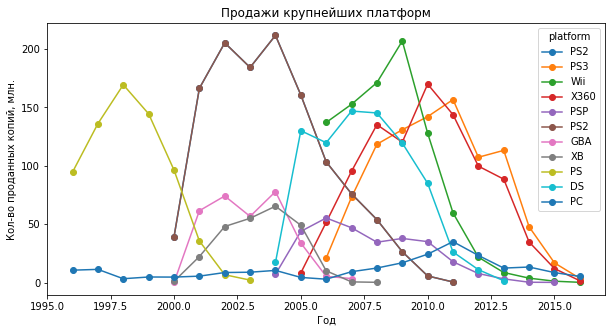

In [21]:
(df.pivot_table(index='year_of_release', columns='platform', values='sales_sum', aggfunc='sum')
 [['PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS2', 'GBA', 'XB', 'PS', 'DS', 'PC']]#самые крупные компании
 .plot(style='o-', figsize=(10, 5), title='Продажи крупнейших платформ'))
plt.xlabel("Год")
plt.ylabel("Кол-во проданных копий, млн.")

Вывод: Из графика видно продажи происходят по следующему сценарию. В первые 2 года  существования компании происходит резкий рост, а потом планомерная стагнация и исчезновение компании. В среднем крупная компания  существует 10(+-2)—лет.

### Срез данных для актуального периода на 2017 год

Их проведенных исследований выше стало понятно за какие года больше всего данных в дата сете и срок существования компании. Те компании которые ушли с рынка до 2000 не повлияют на количество продаж в 2017, поэтому их нужно откинуть.

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.

Поэтому рассмотрим период от 2014 до нынешнего времени (2016) 

In [22]:
#сохраняем данные которые актуальны
df = df[df['year_of_release']>=2014].reset_index(drop=True) 

### Лидирующие компании в продажах 

Отбор 10 компании с наибольшим количеством продаж: 

In [23]:
(
    df.pivot_table(index='platform', values='sales_sum', aggfunc='sum')
    .sort_values(by='sales_sum', ascending=False)
    .head(10)
)

,sales_sum
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Text(0, 0.5, 'Кол-во проданных копий, млн.')

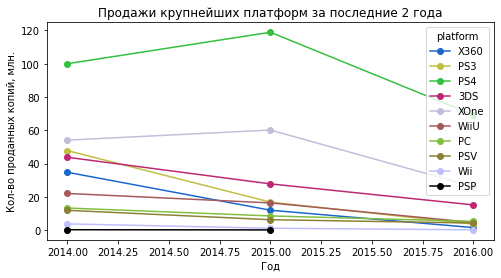

In [24]:
my_color = [(0.1,0.4,0.8),(0.75,0.75,0.25),(0.2,0.75,0.25),(0.75,0.15,0.45),(0.75,0.75,0.85),(0.65,0.35,0.35),(0.5,0.75,0.25),(0.55,0.5,0.2),(0.75,0.75,1),(0,0,0)]
(
    df.pivot_table(index='year_of_release', columns='platform', values='sales_sum', aggfunc='sum')
    [['X360', 'PS3', 'PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']]
    .plot(style='o-', color=my_color, title='Продажи крупнейших платформ за последние 2 года', figsize=(8, 4))
) 
plt.xlabel("Год")
plt.ylabel("Кол-во проданных копий, млн.")

Вывод: Из трендов видно, что к 2016 году у всех компаний упали продажи до минимальных уровней. Отобран топ компании с наиболее крупными продажами на данный момент, являются PS4, Wii и другие. Эти компании будут основные конкуренты в 2017 году. Данные компании специализируются на выпуске игр для консолей, можно сделать из этого вывод что в тренде находятся игры для приставок. Все остальные компании испытывают достаточно большие проблемы в продажах, в некоторых компаниях их практически нет

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 2.0)

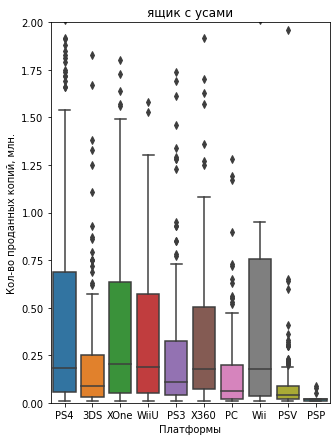

In [34]:
plt.figure(figsize=(5, 7))
sns.boxplot(data=df, x='platform', y='sales_sum')
plt.title('ящик с усами')
plt.xlabel("Платформы")
plt.ylabel("Кол-во проданных копий, млн.")
plt.ylim(0,2)

**Вывод:** Данный тип графика дает понимание насколько большой разброс в данных. Медиана по продажам находиться примерно на 45 млн. «разумный диапазон» находиться примерно в диапазоне от 15 до 70 млн. Так же на графике видно, что в каждой компании присутствуют выбросы это стоит учитывать.

####  Влияют ли отзывы пользователей и критиков на продажи внутри одной популярной платформы.

Из прошлых исследований нам известно что больше всего продаж в `PS4`, его и будем рассматривать.

Text(0, 0.5, 'Кол-во проданных копий, млн.')

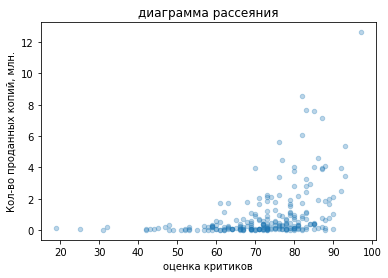

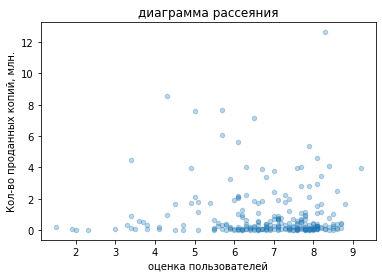

In [27]:
df_360 = df[df['platform']=='PS4'][['platform', 'critic_score', 'user_score', 'sales_sum']]#.hist()

df_360.plot.scatter(x='critic_score', y=['sales_sum'], alpha=0.3)
plt.title('диаграмма рассеяния')
plt.xlabel("оценка критиков")
plt.ylabel("Кол-во проданных копий, млн.")

df_360.plot.scatter(x='user_score', y=['sales_sum'], alpha=0.3)
plt.title('диаграмма рассеяния')
plt.xlabel("оценка пользователей")
plt.ylabel("Кол-во проданных копий, млн.")

In [28]:
df_360.corr()[['sales_sum']]#расчет корреляции

,sales_sum
critic_score,0.402661
user_score,-0.040132
sales_sum,1.000000


**Вывод:** Если смотреть визуально графики. Чем лучше оценивают критики игру, тем больше продаж игр происходит не явно заметно. С пользователями это так не работает + пользователи не так много оставляют плохих отзывов. 

Корреляция отзывов пользователей и критиков от количества продаж практически отсутствует. Т.е. отзывы никак не влияют на количество продаж.

#### Анализ продаж на других платформах от качества отзывов

`critic_score` разделим на 10 чтобы `user_score` были определены оценки в одинаковых категориях 

,critic_score,user_score,sales_sum
critic_score,1.000000,0.910080,0.660664
user_score,0.910080,1.000000,0.744817
sales_sum,0.660664,0.744817,1.000000


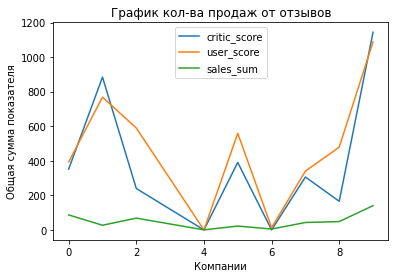

In [29]:
all_platform = df.groupby('platform')[['critic_score', 'user_score', 'sales_sum']].sum().reset_index()
all_platform = all_platform[all_platform['platform'] != 'PS4'] # исключаем `PS4`
all_platform['critic_score'] = all_platform['critic_score']/10 #приведение к одному кэфу
all_platform.plot()
plt.title('График кол-ва продаж от отзывов')
plt.xlabel("Компании")
plt.ylabel("Общая сумма показателя")
all_platform.corr()

**Вывод:**  Уровень оценки пользователей и критиков практически совпал, после приведения к одной категории. Стало видно прямую зависимость между количеством положительных отзывов и объема продаж.

На одной платформе не прослеживается зависимостей, а на всем дата сете есть зависимость качества отзывов и от количества продаж. Скорее всего это связано с тем что выборка точечная и не отражает всех данных или эта компании имеет расхождение с мнением критиков.

### Распределение игр по жанрам, выявление наиболее прибыльных.

In [30]:
df.groupby('genre')[['sales_sum']].median().reset_index().sort_values(by='sales_sum', ascending=False) 

,genre,sales_sum
8,Shooter,0.515
10,Sports,0.180
4,Platform,0.140
2,Fighting,0.125
7,Role-Playing,0.110
9,Simulation,0.100
0,Action,0.090
3,Misc,0.090
6,Racing,0.090
11,Strategy,0.060


**Вывод:** Жанры сгруппированы и расчитана медиана прибыли каждого жанра. Самые прибыльные жанр - шутер. Меньше всего приносящие прибыль стратегии и пазлы тд, если быть более точным примерно в 10-12 раз меньше данные жанры приносят меньше прибыли, чем самый популярный жанр. 

**Общий вывод к Шагу 3**

В этой главе был произведен анализ данных таблицы. Выбран актуальный период для построения дальнейшего прогноза продаж компаний, выявлены передовики и общий тренд. Определены основные крупные платформы, которые приносят основные продажи. Проведена оценка влияния отзывов пользователей/критиков на количество продаж. 

## Шаг. Составиление портета пользователя каждого региона

### Определение пользователя каждого региона

#### Самые популярные платформы (топ-5)

Text(0, 0.5, 'Общая сумма показателя')

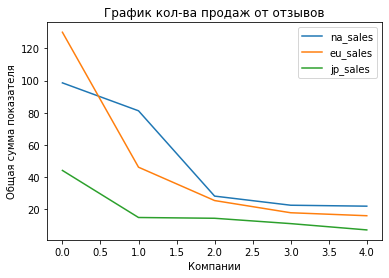

In [31]:
df1 = (df.groupby('platform')[['na_sales']].sum().reset_index()
       .sort_values(by='na_sales', ascending=False).head()
       .reset_index(drop=True).reset_index())

df2 = (df.groupby('platform')[['eu_sales']].sum().reset_index()
       .sort_values(by='eu_sales', ascending=False).head()
       .reset_index(drop=True).reset_index())

df3 = (df.groupby('platform')[['jp_sales']].sum().reset_index()
       .sort_values(by='jp_sales', ascending=False).head()
       .reset_index(drop=True).reset_index())

#В join не вышло передать 2 таблицы, не могу найти такую команду которая объединяла таблицы по индексу, а не столбцу. поэтому так намудрил
df_12 = df1.merge(df2,  on='index')
df_12.merge(df3,  on='index').drop(columns='index').plot()
plt.title('График кол-ва продаж от отзывов')
plt.xlabel("Компании")
plt.ylabel("Общая сумма показателя")

Больше всего продаж приходиться не Северную Америку, а меньше всего на Японию. Крупнейшие игровые компании относятся к Америке, следовательно и продаж происходит там больше.

#### Самые популярные жанры (топ-5)

In [32]:
df.groupby('genre')[['na_sales']].sum().reset_index().sort_values(by='na_sales', ascending=False).head() #США

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


In [33]:
df.groupby('genre')[['eu_sales']].sum().reset_index().sort_values(by='eu_sales', ascending=False).head() #ЕС

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


In [34]:
df.groupby('genre')[['jp_sales']].sum().reset_index().sort_values(by='jp_sales', ascending=False).head() #JP

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


Жанры северной Америки, Европы и Японии очень схожи, только различаются ТОП 1 жанр Японии. Скорее всего этот жанр находиться на первом месте в Японии, потому что в данной стране свое немного отличающиеся представление об играх. 

#### Влияние рейтинга ESRB на продажи в отдельных регионах

In [35]:
df.groupby('rating')[['na_sales']].sum().reset_index().sort_values(by='na_sales', ascending=False) #США

,rating,na_sales
2,M,96.42
0,E,50.74
3,T,38.95
1,E10+,33.23


In [36]:
df.groupby('rating')[['eu_sales']].sum().reset_index().sort_values(by='eu_sales', ascending=False) #ЕС

,rating,eu_sales
2,M,93.44
0,E,58.06
3,T,34.07
1,E10+,26.16


In [37]:
df.groupby('rating')[['jp_sales']].sum().reset_index().sort_values(by='jp_sales', ascending=False) #JP

,rating,jp_sales
3,T,14.78
0,E,8.94
2,M,8.01
1,E10+,4.46


In [38]:
df.groupby('rating')[['other_sales']].sum().reset_index().sort_values(by='other_sales', ascending=False) #Other

,rating,other_sales
2,M,28.67
0,E,15.39
3,T,11.33
1,E10+,7.83


Рейтинг во всех выбранных регионах снова практически совпал. В Японии на 2 месте находится Т – игры для лиц от 13 лет, когда как в других странах М – игры для взрослых.
Лучше всего продаются игры с рейтингом Е – Для всех, Потом идет М, и Т. 

**Вывод:** Пользователь из Северной Америки, достаточно активный пользователь, который отдает большое предпочтение жанрам экшен, спорт и шутер, покупает достаточно большое количество игр. 
Европейский пользователь, более сдержан в покупках имеет такие же предпочтения в жанрах. Две достаточно схожих группы. 
Пользователь и Японии, меньше всех приносит доходов для компаний. Имеет предпочтение играть в ролевые игры, причем пользователи частично придерживаются возрастному цензору в отличие от других стран.  

## Шаг. Проверка гипотиз

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [40]:
xone_mean = df[(df['platform']=='XOne')]['user_score'].fillna(df['user_score'].mean())
pc_mean = df[(df['platform']=='PC')]['user_score'].fillna(df['user_score'].mean())

alpha = 0.05

results = st.ttest_ind(xone_mean, pc_mean, equal_var=False)

print ('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10120317946695495
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза средний пользовательский рейтинг платформы Xbox One и ПК равны, а альтернативная гипотеза средний рейтинг PC и Xbok не равны. Уровень статистической значимости выбран 0.05, такое значение выбрано с учетом отклонения от предпологаемого значения. Статистическая значимость - определяет, где находиться граница и задает вероятность отклонения от центра распределения, которое уже нельзя списать на случайность и потому следует считать значимым. 

Принцип выбора метода: необходимо сравнить две генеральные совокупности, разного размера, на равность. Рассматриваем двухстороннюю гипотезу.  
P-value больше выбранного уровня статистической значимости, т.е. нулевая гипотеза не отвергается в пользу альтернативной.  Другими словами, средний рейтинг двух платформ совпадает.

Пропуски отзывов заполнены средним значением, т.к. если игра устроила большинство пользователей, то и оставшееся количество примерно так же ее оценят. 

### Средние пользовательские рейтинги жанров Action и Sports разные

In [41]:
genre_action = df[(df['genre']=='Action')]['user_score'].fillna(df['user_score'].mean())
genre_sport = df[(df['genre']=='Sports')]['user_score'].fillna(df['user_score'].mean())

alpha = 0.05

results = st.ttest_ind(genre_action, genre_sport, equal_var=False)

print ('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.143405930548463e-14
Отвергаем нулевую гипотизу


Пояснение:

Нулевая гипотеза средний пользовательский рейтинг жанра Экшен и спорт равны, а альтернативная гипотеза средний пользовательский рейтинг жанров Экшен и Спорт разные. Выьран классический уровень доверия тут 95 %, даем возможность отклониться.

Принцип выбора метода: сравниваем две генеральные совокупности, разного размера, на различие. Рассматриваем двухстороннюю гипотезу. 
P-value значительно меньше выбранного уровня статистической значимости нулевая гипотеза отвергается в пользу альтернативной гипотезы.  Другими словами, рейтинг двух жанров различаются.
    
Взятые две независимые выборки для сравнения двух средних пользовательских рейтингов платформ или жанров. Есть специальной метод для проверки равенстве среднего двух генеральных совокупностям, по взятым из них выборкам - метод st.ttest_ind().

## Шаг. Общий вывод

В данном проекте была проведено исследование по количеству продаж игры в разных странах. 

1.	Открытие файла и первичное ознакомление;
2.	Предобработка данных. Подготовка таблицы к исследованию и исправление ошибок и недочетов при заполнении данных;
3.	Исследование данных. Определение основных жанров, в которые предпочитают пользователи, выявление крупнейших компаний, определение актуального временного периода;
4.	Создание предпочтения пользователей для каждого региона;
5.	Проверка гипотез; 

Из данного исследования можно сделать вывод, что в 2017 год все компании входят со сниженным количеством продаж, следовательно больших доходностей не стоит ждать от продаж. Но стоит рекламировать продукцию компаний, которые остаются с достаточно высокими продажами на фоне других: PSP, XOne, PS3, X360. 

Так же необходимо прислушиваться к отзывам пользователей и делать ставку на самые популярные жанры: Экшен, Спорт, Шутер, музыкальны и тд. Только в Японии чуточку другое предпочтение и нужно в основном делать акцент в рекламе на ролевые игры с возрастным цензором.

Проверка гипотез показала, что рейтинги платформ Xbox One и PC не совпадает, это отличие надо иметь в виду, так же, как и Отличающийся пользовательский рейтинг жанров Экшен и Спорт. 

Подводя итог Основные жанры: Экшен, Спорт и Шутеры и тд. От компаний: PSP, XOne, PS3, X360. 	На них нужно делать акцент при рекламе продукции – это самые денежные направления. 
